In [219]:
!pip install prophet

In [220]:
# !pip install tensorflow

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [222]:
df = pd.read_csv(r"C:\Users\ejanv\Downloads\RTD Self-Scheduled Nominations\consolidated_csv_selfsched_08SLWIND_G01.csv")

In [223]:
# transform date column into a datetime column
df['RUN_TIME'] = pd.to_datetime(df['RUN_TIME'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
df = df.set_index('RUN_TIME')
df.head()

,MKT_TYPE,REGION_NAME,ZONE_NAME,RESOURCE_NAME,TIME_INTERVAL,START_TIME,END_TIME,MP_NAME,SELF_SCHED_MW,Unnamed: 10
RUN_TIME,,,,,,,,,,
NaT,RTD,CVIS,PANAY,08SLWIND_G01,06/26/2021 12:05:00 AM,06/26/2021,06/26/2021 12:05:00 AM,TAREC,0.3,NaN
NaT,RTD,CVIS,PANAY,08SLWIND_G01,06/26/2021 12:05:00 AM,06/26/2021,06/26/2021 12:05:00 AM,TAREC,0.3,NaN
2021-06-26 00:05:00,RTD,CVIS,PANAY,08SLWIND_G01,06/26/2021 12:10:00 AM,06/26/2021 12:05:00 AM,06/26/2021 12:10:00 AM,TAREC,0.3,NaN
2021-06-26 00:05:00,RTD,CVIS,PANAY,08SLWIND_G01,06/26/2021 12:10:00 AM,06/26/2021 12:05:00 AM,06/26/2021 12:10:00 AM,TAREC,0.3,NaN
2021-06-26 00:10:00,RTD,CVIS,PANAY,08SLWIND_G01,06/26/2021 12:15:00 AM,06/26/2021 12:10:00 AM,06/26/2021 12:15:00 AM,TAREC,0.3,NaN


In [224]:
duplicate_labels = df.index[df.index.duplicated()]
print("Duplicate Labels:", duplicate_labels)

Duplicate Labels: DatetimeIndex([                'NaT', '2021-06-26 00:05:00',
               '2021-06-26 00:10:00', '2021-06-26 00:15:00',
               '2021-06-26 00:20:00', '2021-06-26 00:25:00',
               '2021-06-26 00:30:00', '2021-06-26 00:35:00',
               '2021-06-26 00:40:00', '2021-06-26 00:45:00',
               ...
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT',
                               'NaT',                 'NaT'],
              dtype='datetime64[ns]', name='RUN_TIME', length=5070, freq=None)


In [225]:
df = df[~df.index.duplicated(keep='first')]
df

,MKT_TYPE,REGION_NAME,ZONE_NAME,RESOURCE_NAME,TIME_INTERVAL,START_TIME,END_TIME,MP_NAME,SELF_SCHED_MW,Unnamed: 10
RUN_TIME,,,,,,,,,,
NaT,RTD,CVIS,PANAY,08SLWIND_G01,06/26/2021 12:05:00 AM,06/26/2021,06/26/2021 12:05:00 AM,TAREC,0.3,NaN
2021-06-26 00:05:00,RTD,CVIS,PANAY,08SLWIND_G01,06/26/2021 12:10:00 AM,06/26/2021 12:05:00 AM,06/26/2021 12:10:00 AM,TAREC,0.3,NaN
2021-06-26 00:10:00,RTD,CVIS,PANAY,08SLWIND_G01,06/26/2021 12:15:00 AM,06/26/2021 12:10:00 AM,06/26/2021 12:15:00 AM,TAREC,0.3,NaN
2021-06-26 00:15:00,RTD,CVIS,PANAY,08SLWIND_G01,06/26/2021 12:20:00 AM,06/26/2021 12:15:00 AM,06/26/2021 12:20:00 AM,TAREC,0.3,NaN
2021-06-26 00:20:00,RTD,CVIS,PANAY,08SLWIND_G01,06/26/2021 12:25:00 AM,06/26/2021 12:20:00 AM,06/26/2021 12:25:00 AM,TAREC,0.3,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-09-25 23:35:00,RTD,CVIS,PANAY,08SLWIND_G01,09/25/2023 11:40:00 PM,09/25/2023 11:35:00 PM,09/25/2023 11:40:00 PM,TAREC,1.4,NaN
2023-09-25 23:40:00,RTD,CVIS,PANAY,08SLWIND_G01,09/25/2023 11:45:00 PM,09/25/2023 11:40:00 PM,09/25/2023 11:45:00 PM,TAREC,1.2,NaN
2023-09-25 23:45:00,RTD,CVIS,PANAY,08SLWIND_G01,09/25/2023 11:50:00 PM,09/25/2023 11:45:00 PM,09/25/2023 11:50:00 PM,TAREC,2.5,NaN


In [226]:
data = df[['SELF_SCHED_MW']]
data = data.asfreq(freq='5T') # Add to complete dates
data

,SELF_SCHED_MW
RUN_TIME,
2021-06-26 00:05:00,0.3
2021-06-26 00:10:00,0.3
2021-06-26 00:15:00,0.3
2021-06-26 00:20:00,0.3
2021-06-26 00:25:00,0.3
...,...
2023-09-25 23:35:00,1.4
2023-09-25 23:40:00,1.2
2023-09-25 23:45:00,2.5


In [227]:
data1 = data.copy()
data1['Date'] = data.index.date
data1

,SELF_SCHED_MW,Date
RUN_TIME,,
2021-06-26 00:05:00,0.3,2021-06-26
2021-06-26 00:10:00,0.3,2021-06-26
2021-06-26 00:15:00,0.3,2021-06-26
2021-06-26 00:20:00,0.3,2021-06-26
2021-06-26 00:25:00,0.3,2021-06-26
...,...,...
2023-09-25 23:35:00,1.4,2023-09-25
2023-09-25 23:40:00,1.2,2023-09-25
2023-09-25 23:45:00,2.5,2023-09-25


In [228]:
max_quantity_per_day = data1.groupby('Date')['SELF_SCHED_MW'].max()
data_max = pd.DataFrame(max_quantity_per_day).reset_index()
data_max

,Date,SELF_SCHED_MW
0,2021-06-26,2.4
1,2021-06-27,1.1
2,2021-06-28,4.9
3,2021-06-29,2.3
4,2021-06-30,1.3
...,...,...
817,2023-09-21,7.2
818,2023-09-22,6.5
819,2023-09-23,15.5
820,2023-09-24,14.5


In [229]:
data_max = data_max.set_index('Date')
data_max.head()

,SELF_SCHED_MW
Date,
2021-06-26,2.4
2021-06-27,1.1
2021-06-28,4.9
2021-06-29,2.3
2021-06-30,1.3


<Axes: xlabel='RUN_TIME'>

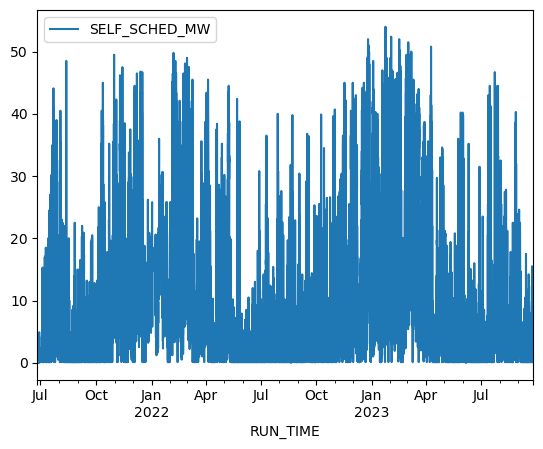

In [230]:
data['SELF_SCHED_MW'] = data['SELF_SCHED_MW'].fillna(method='ffill')
data[['SELF_SCHED_MW']].plot()


<Axes: xlabel='Date'>

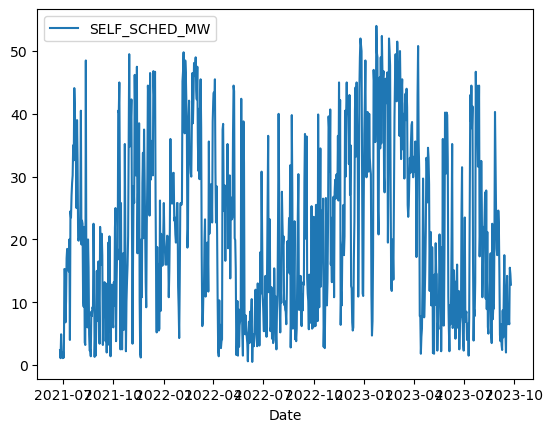

In [231]:
data_max['SELF_SCHED_MW'] = data_max['SELF_SCHED_MW'].fillna(method='ffill')
data_max[['SELF_SCHED_MW']].plot()


In [232]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data)

(0.01, False)

In [233]:
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data_max)

(0.01, False)

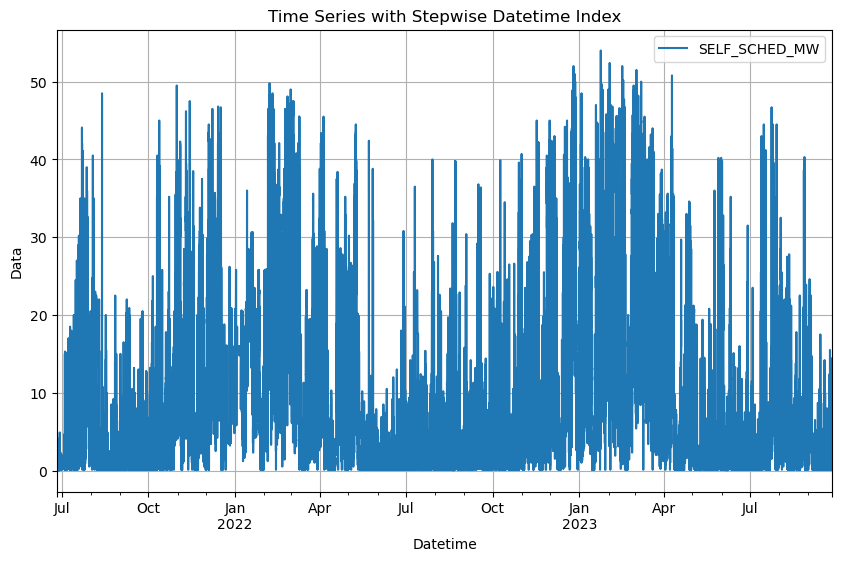

In [234]:
# Plot the time series while preserving the stepwise format
data.plot(figsize=(10, 6))
plt.title('Time Series with Stepwise Datetime Index')
plt.xlabel('Datetime')
plt.ylabel('Data')
plt.grid(True)
plt.show()

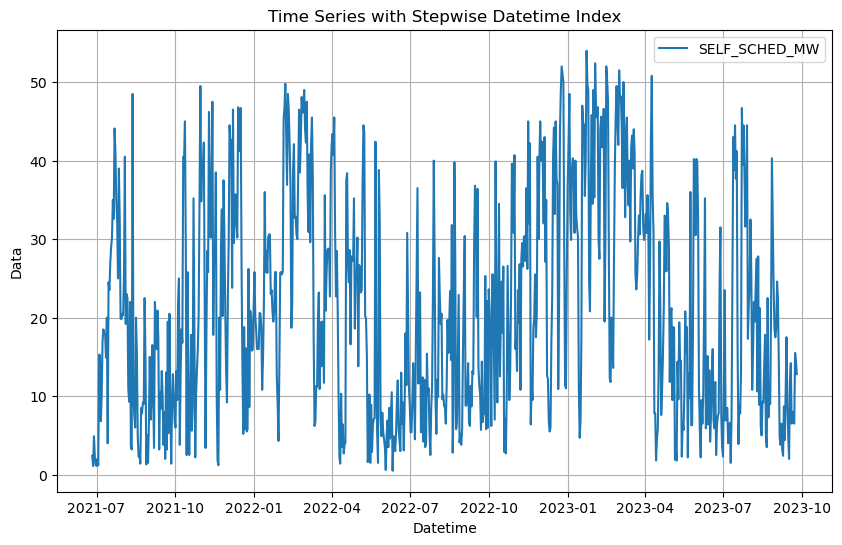

In [235]:
# Plot the time series while preserving the stepwise format
data_max.plot(figsize=(10, 6))
plt.title('Time Series with Stepwise Datetime Index')
plt.xlabel('Datetime')
plt.ylabel('Data')
plt.grid(True)
plt.show()

## Trial Prophet

## LSTM trial

# Prophet

In [236]:
data.reset_index(inplace=True)
data = data.rename(columns={'RUN_TIME': 'ds', 'SELF_SCHED_MW': 'y'})
data

,ds,y
0,2021-06-26 00:05:00,0.3
1,2021-06-26 00:10:00,0.3
2,2021-06-26 00:15:00,0.3
3,2021-06-26 00:20:00,0.3
4,2021-06-26 00:25:00,0.3
...,...,...
236730,2023-09-25 23:35:00,1.4
236731,2023-09-25 23:40:00,1.2
236732,2023-09-25 23:45:00,2.5
236733,2023-09-25 23:50:00,2.8


In [237]:
data_max.reset_index(inplace=True)
data_max = data_max.rename(columns={'Date': 'ds', 'SELF_SCHED_MW': 'y'})
data_max

,ds,y
0,2021-06-26,2.4
1,2021-06-27,1.1
2,2021-06-28,4.9
3,2021-06-29,2.3
4,2021-06-30,1.3
...,...,...
817,2023-09-21,7.2
818,2023-09-22,6.5
819,2023-09-23,15.5
820,2023-09-24,14.5


In [238]:
from prophet import Prophet

# Initialize the model
model1 = Prophet()

# Fit the model to your data
model1.fit(data)

14:57:57 - cmdstanpy - INFO - Chain [1] start processing
15:07:12 - cmdstanpy - INFO - Chain [1] done processing


In [239]:
# Initialize the model
model2 = Prophet()

# Fit the model to your data
model2.fit(data_max)

15:07:15 - cmdstanpy - INFO - Chain [1] start processing
15:07:15 - cmdstanpy - INFO - Chain [1] done processing


In [240]:
future_dates1 = model1.make_future_dataframe(periods=30)
future_dates1.tail()

,ds
236760,2023-10-21 23:55:00
236761,2023-10-22 23:55:00
236762,2023-10-23 23:55:00
236763,2023-10-24 23:55:00
236764,2023-10-25 23:55:00


In [241]:
future_dates2 = model1.make_future_dataframe(periods=30)
future_dates2.tail()

,ds
236760,2023-10-21 23:55:00
236761,2023-10-22 23:55:00
236762,2023-10-23 23:55:00
236763,2023-10-24 23:55:00
236764,2023-10-25 23:55:00


In [242]:
forecast1 = model1.predict(future_dates1)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
236760,2023-10-21 23:55:00,5.573224,-6.110532,18.358873
236761,2023-10-22 23:55:00,6.568476,-5.498594,18.535300
236762,2023-10-23 23:55:00,7.312709,-5.021993,19.916617
236763,2023-10-24 23:55:00,8.133944,-5.101421,20.749351
236764,2023-10-25 23:55:00,7.652103,-5.173802,20.952508


In [243]:
forecast2 = model2.predict(future_dates2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
236760,2023-10-21 23:55:00,23.470460,7.829638,37.993796
236761,2023-10-22 23:55:00,23.446037,8.057615,37.503524
236762,2023-10-23 23:55:00,25.608481,10.503240,39.667274
236763,2023-10-24 23:55:00,24.947672,10.340053,38.853170
236764,2023-10-25 23:55:00,25.396087,12.286319,39.766860


In [244]:
forecast1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-06-26 00:05:00,5.577012,-13.058202,7.131453,5.577012,5.577012,-8.298604,-8.298604,-8.298604,-2.016788,...,-0.483420,-0.483420,-0.483420,-5.798396,-5.798396,-5.798396,0.0,0.0,0.0,-2.721592
1,2021-06-26 00:10:00,5.578438,-12.662483,6.864858,5.578438,5.578438,-8.311797,-8.311797,-8.311797,-2.026747,...,-0.485212,-0.485212,-0.485212,-5.799838,-5.799838,-5.799838,0.0,0.0,0.0,-2.733359
2,2021-06-26 00:15:00,5.579864,-12.709191,8.262120,5.579864,5.579864,-8.324419,-8.324419,-8.324419,-2.036142,...,-0.486996,-0.486996,-0.486996,-5.801280,-5.801280,-5.801280,0.0,0.0,0.0,-2.744555
3,2021-06-26 00:20:00,5.581290,-12.895006,6.859063,5.581290,5.581290,-8.336463,-8.336463,-8.336463,-2.044970,...,-0.488772,-0.488772,-0.488772,-5.802722,-5.802722,-5.802722,0.0,0.0,0.0,-2.755173
4,2021-06-26 00:25:00,5.582716,-12.597556,8.031722,5.582716,5.582716,-8.347924,-8.347924,-8.347924,-2.053224,...,-0.490538,-0.490538,-0.490538,-5.804162,-5.804162,-5.804162,0.0,0.0,0.0,-2.765208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236760,2023-10-21 23:55:00,34.718127,-6.110532,18.358873,29.423059,39.026803,-29.144903,-29.144903,-29.144903,-1.995211,...,-0.316885,-0.316885,-0.316885,-26.832808,-26.832808,-26.832808,0.0,0.0,0.0,5.573224
236761,2023-10-22 23:55:00,34.959422,-5.498594,18.535300,29.212355,39.628649,-28.390946,-28.390946,-28.390946,-1.995211,...,0.189505,0.189505,0.189505,-26.585240,-26.585240,-26.585240,0.0,0.0,0.0,6.568476
236762,2023-10-23 23:55:00,35.200716,-5.021993,19.916617,29.126621,40.461842,-27.888007,-27.888007,-27.888007,-1.995211,...,0.423321,0.423321,0.423321,-26.316118,-26.316118,-26.316118,0.0,0.0,0.0,7.312709
236763,2023-10-24 23:55:00,35.442011,-5.101421,20.749351,29.001956,40.983461,-27.308068,-27.308068,-27.308068,-1.995211,...,0.715321,0.715321,0.715321,-26.028178,-26.028178,-26.028178,0.0,0.0,0.0,8.133944


In [245]:
forecast2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-06-26 00:05:00,19.679241,-9.928328,17.839363,19.679241,19.679241,-15.907341,-15.907341,-15.907341,-0.612422,-0.612422,-0.612422,-15.294919,-15.294919,-15.294919,0.0,0.0,0.0,3.771900
1,2021-06-26 00:10:00,19.679262,-10.106442,17.875683,19.679262,19.679262,-15.905154,-15.905154,-15.905154,-0.610460,-0.610460,-0.610460,-15.294693,-15.294693,-15.294693,0.0,0.0,0.0,3.774108
2,2021-06-26 00:15:00,19.679283,-10.722750,18.397887,19.679283,19.679283,-15.902938,-15.902938,-15.902938,-0.608471,-0.608471,-0.608471,-15.294467,-15.294467,-15.294467,0.0,0.0,0.0,3.776345
3,2021-06-26 00:20:00,19.679303,-10.968661,17.658320,19.679303,19.679303,-15.900694,-15.900694,-15.900694,-0.606455,-0.606455,-0.606455,-15.294239,-15.294239,-15.294239,0.0,0.0,0.0,3.778610
4,2021-06-26 00:25:00,19.679324,-8.802094,18.730649,19.679324,19.679324,-15.898421,-15.898421,-15.898421,-0.604412,-0.604412,-0.604412,-15.294010,-15.294010,-15.294010,0.0,0.0,0.0,3.780903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236760,2023-10-21 23:55:00,24.775227,7.829638,37.993796,24.775217,24.775237,-1.304766,-1.304766,-1.304766,-0.143998,-0.143998,-0.143998,-1.160768,-1.160768,-1.160768,0.0,0.0,0.0,23.470460
236761,2023-10-22 23:55:00,24.781240,8.057615,37.503524,24.781230,24.781251,-1.335202,-1.335202,-1.335202,-0.586496,-0.586496,-0.586496,-0.748707,-0.748707,-0.748707,0.0,0.0,0.0,23.446037
236762,2023-10-23 23:55:00,24.787253,10.503240,39.667274,24.787243,24.787264,0.821228,0.821228,0.821228,1.140096,1.140096,1.140096,-0.318868,-0.318868,-0.318868,0.0,0.0,0.0,25.608481
236763,2023-10-24 23:55:00,24.793266,10.340053,38.853170,24.793256,24.793277,0.154406,0.154406,0.154406,0.029334,0.029334,0.029334,0.125072,0.125072,0.125072,0.0,0.0,0.0,24.947672


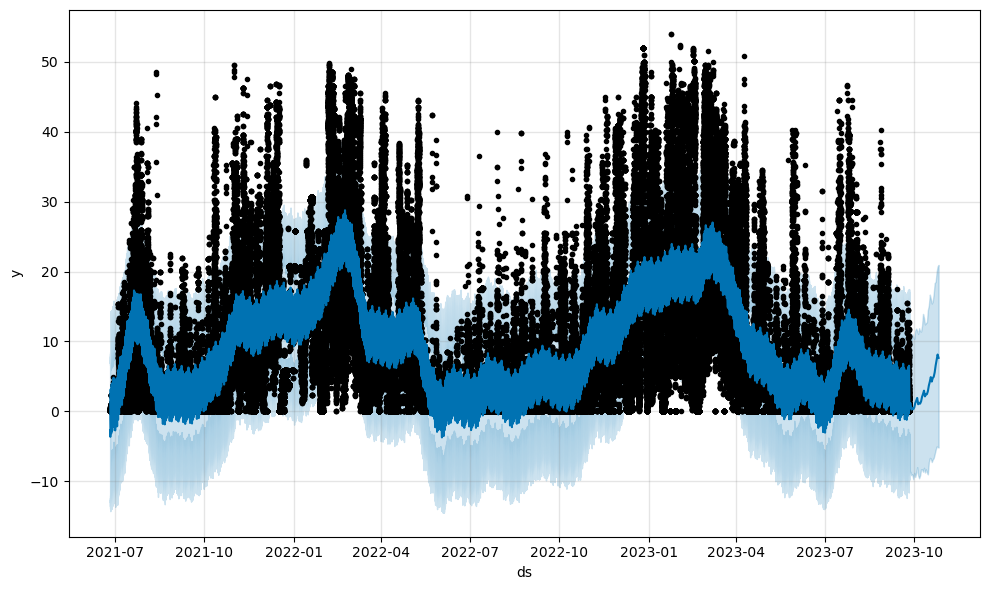

In [246]:
fig1 = model1.plot(forecast1)

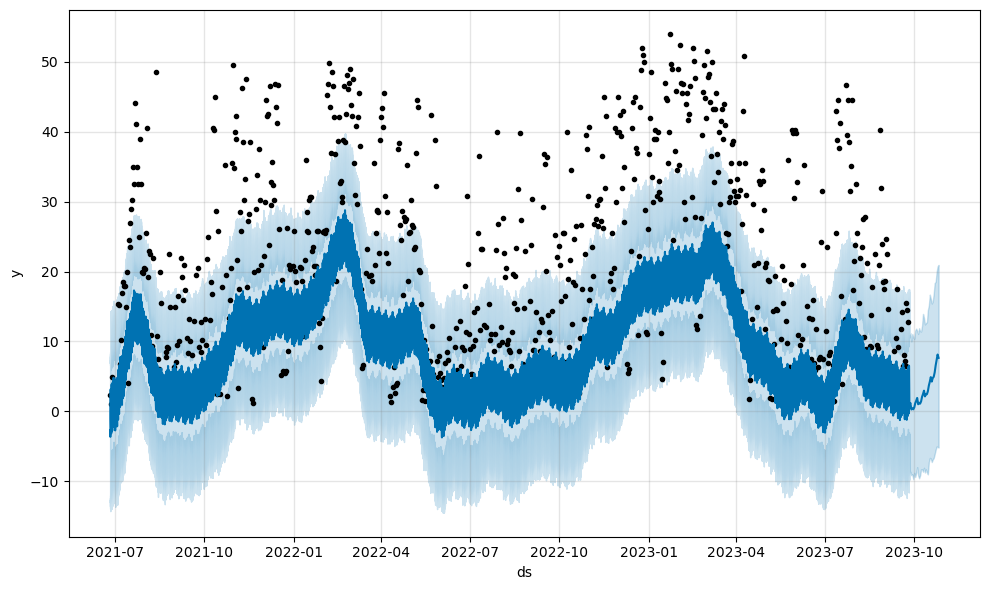

In [247]:
fig2 = model2.plot(forecast1)

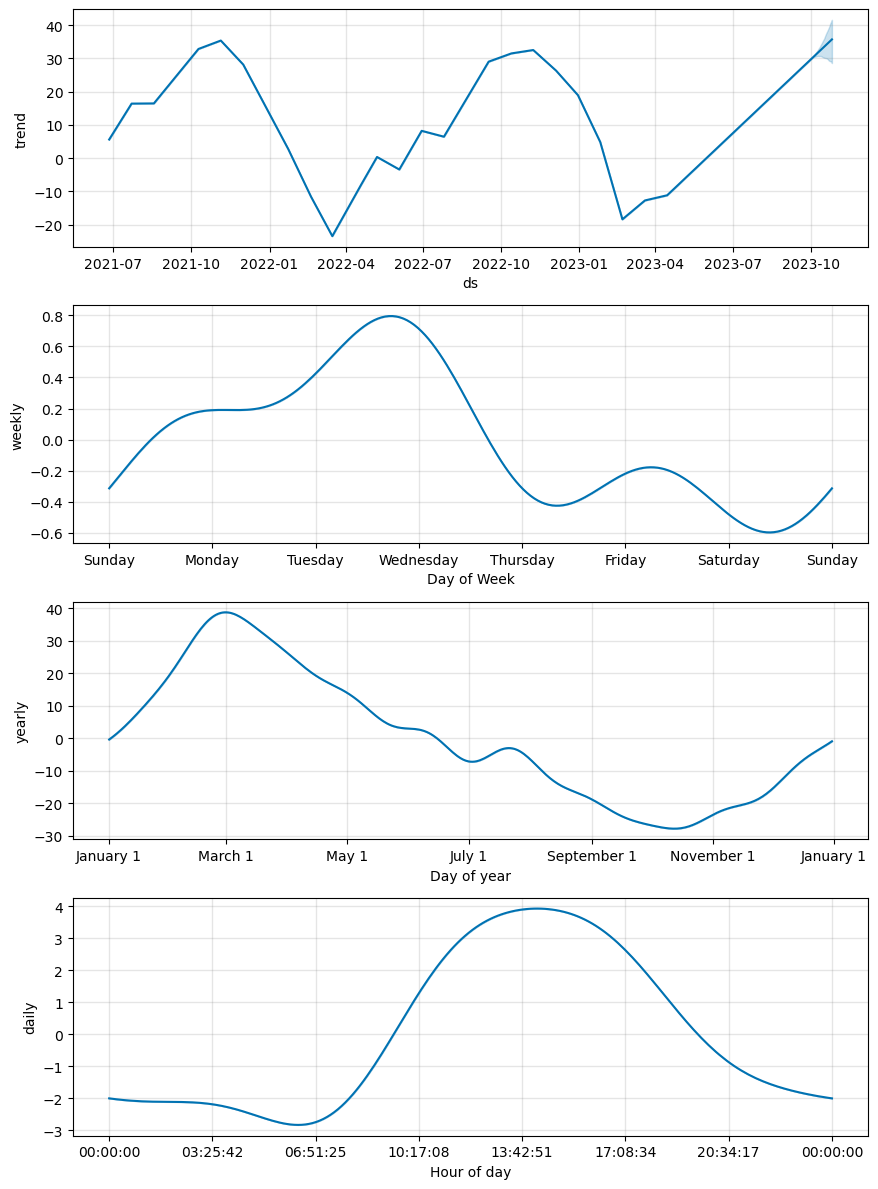

In [248]:
fig_components1 = model1.plot_components(forecast1)

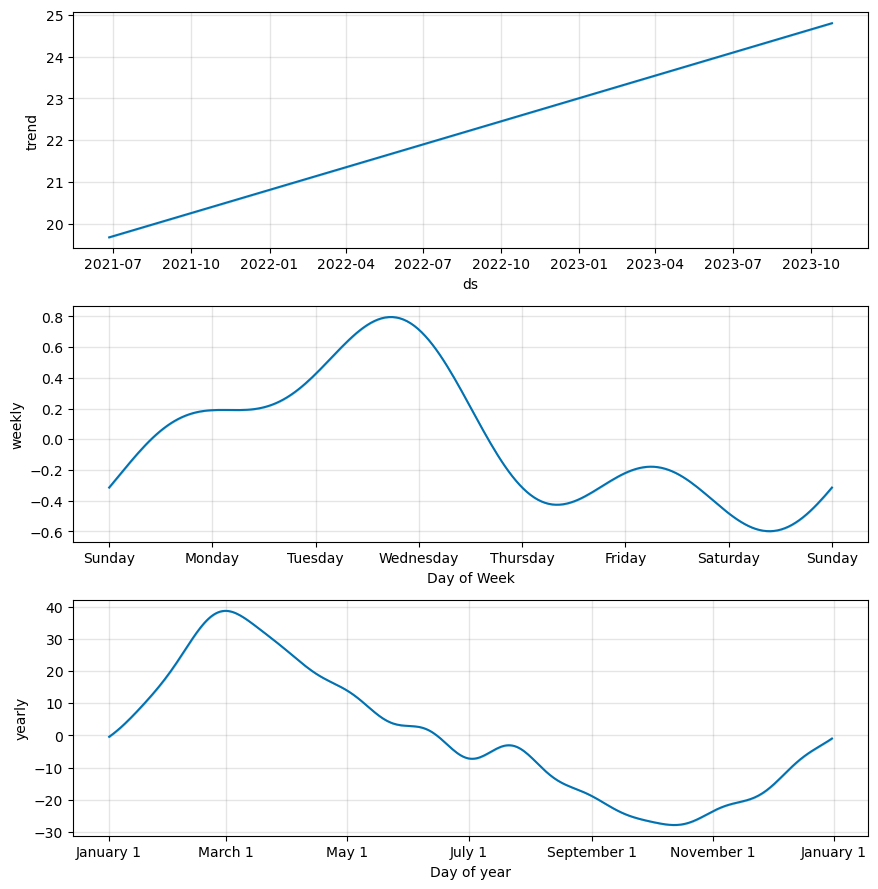

In [249]:
fig_components2 = model1.plot_components(forecast2)

In [250]:
data_max.head(20)

,ds,y
0,2021-06-26,2.4
1,2021-06-27,1.1
2,2021-06-28,4.9
3,2021-06-29,2.3
4,2021-06-30,1.3
5,2021-07-01,1.1
6,2021-07-02,2.0
7,2021-07-03,1.2
8,2021-07-04,15.3
9,2021-07-05,15.2


## Plotly Prophet

### Super long and usually lags if noob laptop

## Prophet with metrics 

# This part is the reference to Auto ARIMA model